# Taxonomic classifier runtime analyses

In [1]:
%matplotlib inline

from glob import glob
from os.path import join, split, splitext, expandvars
import pandas as pd
import seaborn as sns

input_dir = expandvars("$HOME/data/2015.03.06-tax-assignment-runtime")
num_input_seqs = 9983
num_reference_seqs = 89339

In [2]:
data = []
for fp in glob(join(input_dir, "*.txt")):
    run_id_fields = splitext(split(fp)[1])[0].split('-')
    runtime_s = open(fp, 'U').read().strip()
    
    # Ignore missing data - this is useful for 
    # generating test plots before all analyses have completed.
    if runtime_s == "": continue
    
    data.append((run_id_fields[0], 
                float(run_id_fields[1][1:]), 
                float(run_id_fields[2][1:]), 
                float(run_id_fields[2][1:]) * num_reference_seqs, 
                int(run_id_fields[3][4:]),
                float(runtime_s)))

In [3]:
df = pd.DataFrame(data, columns=["Method", "Fraction of Query Sequences", "Fraction of Reference Sequences", "Number of Reference Sequences", "Iteration", "Runtime (s)"])
df = df.groupby(("Method", "Fraction of Query Sequences", "Number of Reference Sequences")).median().reset_index()

## Runtime as a function of number of reference sequences

In these plots, only a single query sequence is searched against the reference database, so the lines illustrate the effect of number of reference sequences on runtime.  This tells us how long it takes to assign taxonomy to the first sequence in our database, and therefore provides a measure of time needed to index the reference.

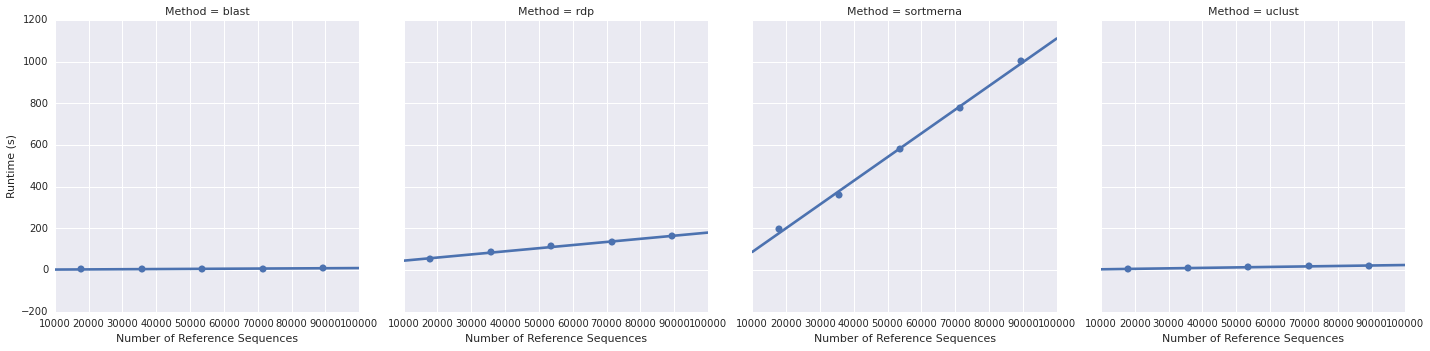

In [4]:
pl = sns.lmplot("Number of Reference Sequences", "Runtime (s)", col="Method", 
                  data=df[df["Fraction of Query Sequences"] == 0.00001],
                  ci=None, size=5, 
                  scatter_kws={"s": 50, "alpha": 1}, sharey=True)

In [5]:
df[df["Fraction of Query Sequences"] == 0.00001]

Method  Fraction of Query Sequences  Number of Reference Sequences  \
0       blast                      0.00001                        17867.8   
1       blast                      0.00001                        35735.6   
2       blast                      0.00001                        53603.4   
3       blast                      0.00001                        71471.2   
4       blast                      0.00001                        89339.0   
8         rdp                      0.00001                        17867.8   
9         rdp                      0.00001                        35735.6   
10        rdp                      0.00001                        53603.4   
11        rdp                      0.00001                        71471.2   
12        rdp                      0.00001                        89339.0   
17  sortmerna                      0.00001                        17867.8   
18  sortmerna                      0.00001                        35735.6   
19  sortmerna                      0.00001                        53603.4   
20  sortmerna                      0.00001                        71471.2   
21  sortmerna                      0.00001                        89339.0   
26     uclust                      0.00001                        17867.8   
27     uclust                      0.00001                        35735.6   
28     uclust                      0.00001                        53603.4   
29     uclust                      0.00001                        71471.2   
30     uclust                      0.00001                        89339.0   

    Fraction of Reference Sequences  Iteration  Runtime (s)  
0                               0.2          0         3.61  
1                               0.4          0         4.65  
2                               0.6          0         5.98  
3                               0.8          0         7.41  
4                               1.0          0         9.31  
8                               0.2          0        52.52  
9                               0.4          0        88.87  
10                              0.6          0       113.41  
11                              0.8          0       135.45  
12                              1.0          0       163.14  
17                              0.2          0       196.83  
18                              0.4          0       360.11  
19                              0.6          0       579.37  
20                              0.8          0       776.14  
21                              1.0          0      1005.73  
26                              0.2          0         5.76  
27                              0.4          0         9.66  
28                              0.6          0        13.73  
29                              0.8          0        18.88  
30                              1.0          0        21.63

## Runtime as a function of number of query sequences

These plots gives us an idea of how runtime scales with number of input sequences by varying the number of sequences that taxonomy is assigned to. Since database indexing is included in all of these steps, we care most about the slope of the line and very little about the y-intercept (which represents how long the database takes to index, and is a step can be typically performed once for multiple runs of a taxonomic assigner so it's a one-time cost and thus isn't as important.

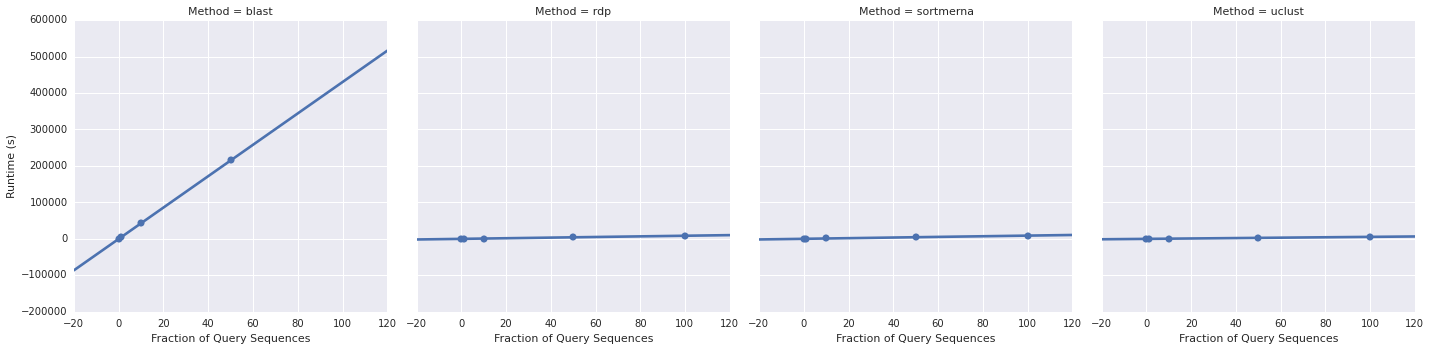

In [6]:
pl = sns.lmplot("Fraction of Query Sequences", "Runtime (s)", col="Method", 
                data=df[df["Fraction of Reference Sequences"] == 0.20],
                ci=None, size=5, 
                scatter_kws={"s": 50, "alpha": 1}, sharey=True)


In [7]:
df[df["Fraction of Reference Sequences"] == 0.2]

Method  Fraction of Query Sequences  Number of Reference Sequences  \
0       blast                      0.00001                        17867.8   
5       blast                      1.00000                        17867.8   
6       blast                     10.00000                        17867.8   
7       blast                     50.00000                        17867.8   
8         rdp                      0.00001                        17867.8   
13        rdp                      1.00000                        17867.8   
14        rdp                     10.00000                        17867.8   
15        rdp                     50.00000                        17867.8   
16        rdp                    100.00000                        17867.8   
17  sortmerna                      0.00001                        17867.8   
22  sortmerna                      1.00000                        17867.8   
23  sortmerna                     10.00000                        17867.8   
24  sortmerna                     50.00000                        17867.8   
25  sortmerna                    100.00000                        17867.8   
26     uclust                      0.00001                        17867.8   
31     uclust                      1.00000                        17867.8   
32     uclust                     10.00000                        17867.8   
33     uclust                     50.00000                        17867.8   
34     uclust                    100.00000                        17867.8   

    Fraction of Reference Sequences  Iteration  Runtime (s)  
0                               0.2          0         3.61  
5                               0.2          0      4364.25  
6                               0.2          0     42768.99  
7                               0.2          0    215095.93  
8                               0.2          0        52.52  
13                              0.2          0       140.54  
14                              0.2          0       916.69  
15                              0.2          0      4233.45  
16                              0.2          0      8618.47  
17                              0.2          0       196.83  
22                              0.2          0       268.62  
23                              0.2          0      1037.44  
24                              0.2          0      4527.00  
25                              0.2          0      8968.21  
26                              0.2          0         5.76  
31                              0.2          0        61.02  
32                              0.2          0       560.60  
33                              0.2          0      2711.36  
34                              0.2          0      5519.91